In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashwatwork/identifying-disease-in-tea-leafs")

print("Path to dataset files:", path)

100%|██████████| 740M/740M [00:11<00:00, 67.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1


In [ ]:
dataset_dir = path
# Menampilkan folder dalam dataset
for root, dirs, files in os.walk(dataset_dir):
    print(f"Direktori: {root}")
    print(f"Subfolder: {dirs}")
    print(f"Files: {files}")
    print()

Direktori: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1
Subfolder: ['tea sickness dataset']
Files: []

Direktori: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset
Subfolder: ['bird eye spot', 'algal leaf', 'white spot', 'gray light', 'brown blight', 'healthy', 'Anthracnose', 'red leaf spot']
Files: []

Direktori: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset/bird eye spot
Subfolder: []
Files: ['IMG_20220503_155122.jpg', 'IMG_20220503_155620.jpg', 'IMG_20220503_155647.jpg', 'IMG_20220503_154813.jpg', 'IMG_20220503_155509.jpg', 'IMG_20220503_160510.jpg', 'IMG_20220503_155412.jpg', 'IMG_20220503_155627.jpg', 'IMG_20220503_154020.jpg', 'IMG_20220503_154602.jpg', 'IMG_20220503_155022.jpg', 'IMG_20220503_154835.jpg', 'IMG_20220503_155330.jpg', 'IMG_20220503_154153.jpg', 'IMG_20220503_160809.jpg', 'IMG_20220503_155227.jpg', 'I

In [ ]:
# Path ke dataset
base_path = '/root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset'

# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['bird eye spot', 'algal leaf', 'white spot', 'gray light', 'brown blight', 'healthy', 'Anthracnose', 'red leaf spot']

# Menampilkan kategori beserta jumlah gambarnya
category_counts = {category: len(os.listdir(os.path.join(base_path, category))) for category in categories}
print("Jumlah gambar per kategori:", category_counts)


Jumlah gambar per kategori: {'bird eye spot': 100, 'algal leaf': 113, 'white spot': 142, 'gray light': 100, 'brown blight': 113, 'healthy': 74, 'Anthracnose': 100, 'red leaf spot': 143}


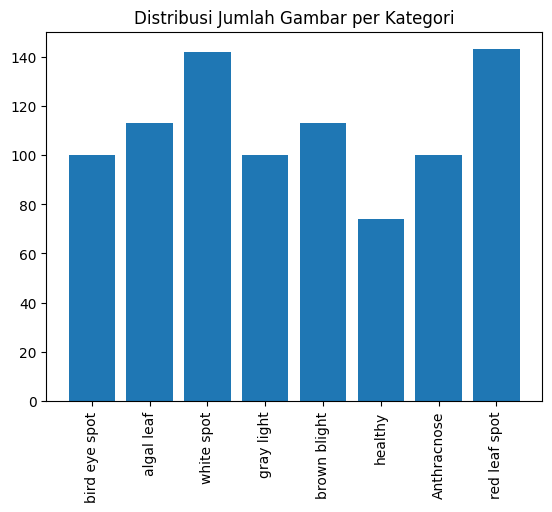

In [ ]:
# Distibusi kelas
plt.bar(category_counts.keys(), category_counts.values())
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Gambar per Kategori")
plt.show()

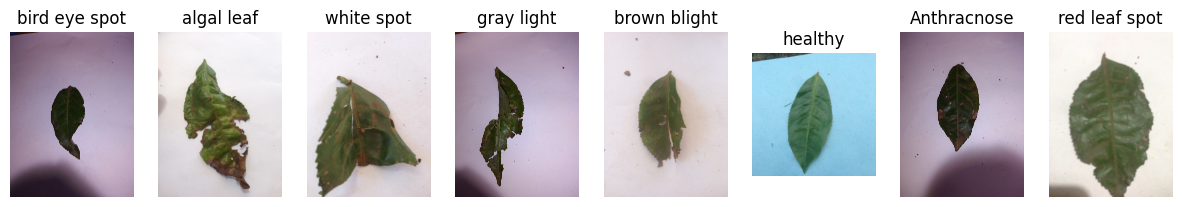

In [ ]:
# Visualisasi Gambar
# Menampilkan gambar secara random dari setiap kategori
fig, axs = plt.subplots(1, len(categories), figsize=(15, 3))

for i, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    random_image = random.choice(os.listdir(category_path))
    img = Image.open(os.path.join(category_path, random_image))

    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')

plt.show()


In [ ]:
# Mengecek Duplikasi Gambar
# Menghitung hash file gambar
def get_image_hash(image_path):
    hash_md5 = hashlib.md5()
    with open(image_path, "rb") as f:
        for byte_block in iter(lambda: f.read(4096), b""):
            hash_md5.update(byte_block)
    return hash_md5.hexdigest()

# Path ke dataset
base_path = '/root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset'

# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['bird eye spot', 'algal leaf', 'white spot', 'gray light', 'brown blight', 'healthy', 'Anthracnose', 'red leaf spot']

# Menyimpan hash gambar untuk memeriksa duplikasi
image_hashes = set()
duplicates = []

# Mengecek dan menghapus duplikasi
for category in categories:
    category_path = os.path.join(base_path, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)

        # Mendapatkan hash gambar
        img_hash = get_image_hash(img_path)

        # Duplikat jika hash ditemukan
        if img_hash in image_hashes:
            duplicates.append(img_path)
            os.remove(img_path)  # Menghapus gambar duplikat
            print(f"Duplikat ditemukan dan dihapus: {img_path}")
        else:
            image_hashes.add(img_hash)

# Menampilkan hasil
if len(duplicates) == 0:
    print("Tidak ada duplikasi yang ditemukan.")
else:
    print(f"Total gambar duplikat yang dihapus: {len(duplicates)}")


Duplikat ditemukan dan dihapus: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset/gray light/IMG_20220503_142632 - Copy.jpg
Duplikat ditemukan dan dihapus: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset/gray light/IMG_20220503_142658.jpg
Duplikat ditemukan dan dihapus: /root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset/Anthracnose/IMG_20220503_150405.jpg
Total gambar duplikat yang dihapus: 3


In [ ]:
# Memeriksa gambar yang rusak
for category in categories:
    category_path = os.path.join(base_path, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Cek apakah gambar valid
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image: {img_path}")

In [ ]:
# Memeriksa ukuran gambar
image_sizes = []
for category in categories:
    category_path = os.path.join(base_path, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img = Image.open(img_path)
        image_sizes.append(img.size)

# Menampilkan beberapa ukuran gambar
print(image_sizes[:10])  # Menampilkan ukuran gambar pertama



[(4160, 3120), (4160, 3120), (4160, 3120), (3120, 4160), (4160, 3120), (3120, 4160), (3120, 4160), (4160, 3120), (3120, 4160), (3120, 4160)]


In [ ]:
# Split dataset (train, validation, test)
base_path = '/root/.cache/kagglehub/datasets/shashwatwork/identifying-disease-in-tea-leafs/versions/1/tea sickness dataset'
train_dir = '/tea_sickness_dataset/train_data'
validation_dir = '/tea_sickness_dataset/validation_data'
test_dir = '/tea_sickness_dataset/test_data'

# Membuat direktori untuk train, validation, dan test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Daftar kategori daun sehat dan daun yang sakit
categories = ['bird eye spot', 'algal leaf', 'white spot', 'gray light', 'brown blight', 'healthy', 'Anthracnose', 'red leaf spot']

for category in categories:
    category_path = os.path.join(base_path, category)
    images = os.listdir(category_path)

    # Membagi data menjadi train (80%), validation (10%), dan test (10%)
    train_images, temp_images = train_test_split(images, test_size=0.2, random_state=42)
    validation_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Membuat folder untuk masing-masing kategori di dalam train, validation, dan test
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Memindahkan gambar ke dalam direktori yang sesuai
    for img_name in train_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(train_dir, category, img_name))
    for img_name in validation_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(validation_dir, category, img_name))
    for img_name in test_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(test_dir, category, img_name))

print("Data berhasil dibagi ke dalam train, validation, dan test.")


Data berhasil dibagi ke dalam train, validation, dan test.


In [ ]:
# Mengecek Struktur Folder (train, validation, dan test)
train_dir = '/tea_sickness_dataset/train_data'
validation_dir = '/tea_sickness_dataset/validation_data'
test_dir = '/tea_sickness_dataset/test_data'

# Fungsi untuk menampilkan struktur folder
def print_directory_structure(directory):
    print(f"Struktur folder di {directory}:")
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)  # Menghitung kedalaman folder
        indent = ' ' * 4 * level  # Membuat indentasi
        print(f"{indent}[{os.path.basename(root)}]")  # Menampilkan nama folder
        #for file in files:
            #print(f"{indent}    {file}")  # Menampilkan file di dalam folder
    #print()

# Menampilkan struktur folder (train, test, dan validation)
print_directory_structure(train_dir)
print_directory_structure(validation_dir)
print_directory_structure(test_dir)


Struktur folder di /tea_sickness_dataset/train_data:
[train_data]
    [bird eye spot]
    [algal leaf]
    [white spot]
    [gray light]
    [brown blight]
    [healthy]
    [Anthracnose]
    [red leaf spot]
Struktur folder di /tea_sickness_dataset/validation_data:
[validation_data]
    [bird eye spot]
    [algal leaf]
    [white spot]
    [gray light]
    [brown blight]
    [healthy]
    [Anthracnose]
    [red leaf spot]
Struktur folder di /tea_sickness_dataset/test_data:
[test_data]
    [bird eye spot]
    [algal leaf]
    [white spot]
    [gray light]
    [brown blight]
    [healthy]
    [Anthracnose]
    [red leaf spot]


In [ ]:
# Augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai pixel gambar menjadi antara 0 dan 1
    rotation_range=40,  # Rotasi gambar secara random
    width_shift_range=0.2,  # Pergeseran gambar (horizontal)
    height_shift_range=0.2,  # Pergeseran gambar (vertikal)
    shear_range=0.2,  # Pembengkokan gambar secara random
    zoom_range=0.2,  # Zoom gambar secara random
    horizontal_flip=True,  # Pembalikan gambar (horizontal)
    fill_mode='nearest'  # Pengisian ulang piksel yang hilang setelah augmentasi
)

# Normalisasi untuk validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Membaca data dari dir menggunakan flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ubah ukuran gambar menjadi 150x150
    batch_size=32,
    class_mode='categorical'  # Untuk klasifikasi multi-kelas
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Menampilkan info tentang jumlah gambar dalam setiap set (train, validation, test)
print("Training Data Info:")
print(f"Total images in train: {train_generator.samples}")
print(f"Classes in train: {train_generator.class_indices}")
print()

print("Validation Data Info:")
print(f"Total images in validation: {validation_generator.samples}")
print(f"Classes in validation: {validation_generator.class_indices}")
print()

print("Test Data Info:")
print(f"Total images in test: {test_generator.samples}")
print(f"Classes in test: {test_generator.class_indices}")

Found 703 images belonging to 8 classes.
Found 87 images belonging to 8 classes.
Found 92 images belonging to 8 classes.
Training Data Info:
Total images in train: 703
Classes in train: {'Anthracnose': 0, 'algal leaf': 1, 'bird eye spot': 2, 'brown blight': 3, 'gray light': 4, 'healthy': 5, 'red leaf spot': 6, 'white spot': 7}

Validation Data Info:
Total images in validation: 87
Classes in validation: {'Anthracnose': 0, 'algal leaf': 1, 'bird eye spot': 2, 'brown blight': 3, 'gray light': 4, 'healthy': 5, 'red leaf spot': 6, 'white spot': 7}

Test Data Info:
Total images in test: 92
Classes in test: {'Anthracnose': 0, 'algal leaf': 1, 'bird eye spot': 2, 'brown blight': 3, 'gray light': 4, 'healthy': 5, 'red leaf spot': 6, 'white spot': 7}
